In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import tensorflow as tf
import h5py
from sklearn.metrics import confusion_matrix

from iris_data import train, x_train, y_train, \
                      test, x_test, y_test, \
                      SPECIES, LARGE

In [3]:
np.random.seed(1)
tf.set_random_seed(1)

In [4]:
# construct model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(2))
model.add(tf.keras.layers.Dense(len(SPECIES), activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adagrad(lr=0.1),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

In [5]:
# train
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10)

history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    batch_size=1, epochs=100, shuffle=True,
                    callbacks=[early_stopping])

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 0s 2ms/step - loss: 0.6457 - sparse_categorical_accuracy: 0.7417 - val_loss: 0.4787 - val_sparse_categorical_accuracy: 0.7333
Epoch 2/100
120/120 [==============================] - 0s 823us/step - loss: 0.4086 - sparse_categorical_accuracy: 0.7833 - val_loss: 0.4288 - val_sparse_categorical_accuracy: 0.8000
Epoch 3/100
120/120 [==============================] - 0s 889us/step - loss: 0.3734 - sparse_categorical_accuracy: 0.8583 - val_loss: 0.4198 - val_sparse_categorical_accuracy: 0.8000
Epoch 4/100
120/120 [==============================] - 0s 895us/step - loss: 0.3472 - sparse_categorical_accuracy: 0.8583 - val_loss: 0.3821 - val_sparse_categorical_accuracy: 0.9000
Epoch 5/100
120/120 [==============================] - 0s 880us/step - loss: 0.3275 - sparse_categorical_accuracy: 0.8917 - val_loss: 0.3929 - val_sparse_categorical_accuracy: 0.8000
Epoch 6/100
120/120 [=====================

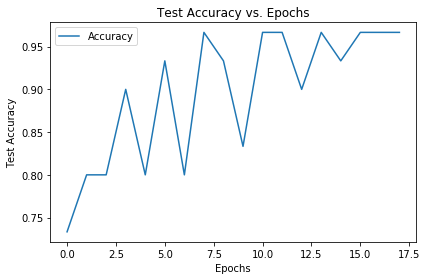

In [6]:
# graph of loss metrics over time
plt.ylabel('Test Accuracy')
plt.xlabel('Epochs')
plt.title('Test Accuracy vs. Epochs')
plt.tight_layout()
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Accuracy')
plt.legend()
plt.show()

In [7]:
# confusion matrix
y_test_pred = np.argmax(model.predict(x_test), axis=1)
confusion_matrix(y_test, y_test_pred)

array([[ 8,  0,  0],
       [ 0, 13,  1],
       [ 0,  0,  8]])

In [8]:
# export
tf.keras.models.save_model(model, 'models/iris_keras.h5', overwrite=True, include_optimizer=True)

In [9]:
# test import
del model
model = tf.keras.models.load_model('models/iris_keras.h5')
y_test_pred2 = np.argmax(model.predict(x_test), axis=1)
assert np.array_equal(y_test_pred, y_test_pred2)